Inainte sa trimiti notebook-ul:

* asigura-te ca totul se executa cum trebuie. Prima oara, **restarteaza kernel-ul** (in meniu, selecteaza Kernel$\rightarrow$Restart & Run all);

* nu lasa niciun mesaj la output (`disp`, `printf`, linii care nu sunt incheiate cu `;`) in functiile pe care le scrii decat daca ti se specifica explicit sa faci acest lucru! Orice abatere va fi **depunctata automat** de grader;

* citeste instructiunile de [aici](https://github.com/radusqrt/numerical-methods/blob/master/lab_instructions.md) cu atentie;

* asigura-te ca rezolvi toate celulele in care scrie `YOUR CODE HERE` sau `YOUR ANSWER HERE` si ca iti treci numele mai jos:

In [1]:
STUDENT_NAME = "Babian Stelian Alexandru";

---

# Laborator 12-13: Derivare numerică
### Autor: Radu Stochitoiu

## Functii ajutatoare

In [17]:
function plot_taylor(f, t0, x0, h, N, approx)
    xx = linspace(t0, t0 + N * h);
    hold;
    plot(xx, f(xx));
    plot([x0:h:x0+N*h], approx, '.', 'markersize', 14);
endfunction

## Problema 1

Implementati funcția ```taylor_1(df, t0, x0, h, N)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$) ce reprezintă derivata lui $x(t)$, un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, și numărul total de pași, $N$, și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

Taylor 1 = Euler

In [3]:
function [values] = taylor_1(df, t0, x0, h, N)
    % YOUR CODE HERE
    values = zeros(1, N + 1);
    
    for i = 2 : N + 1
        values(1) = x0;
        tk = t0 + h * (i - 2);
        xk = values(i - 1);
        values(i) = xk + h * df(tk, xk);
    endfor
    
endfunction

In [ ]:
function 

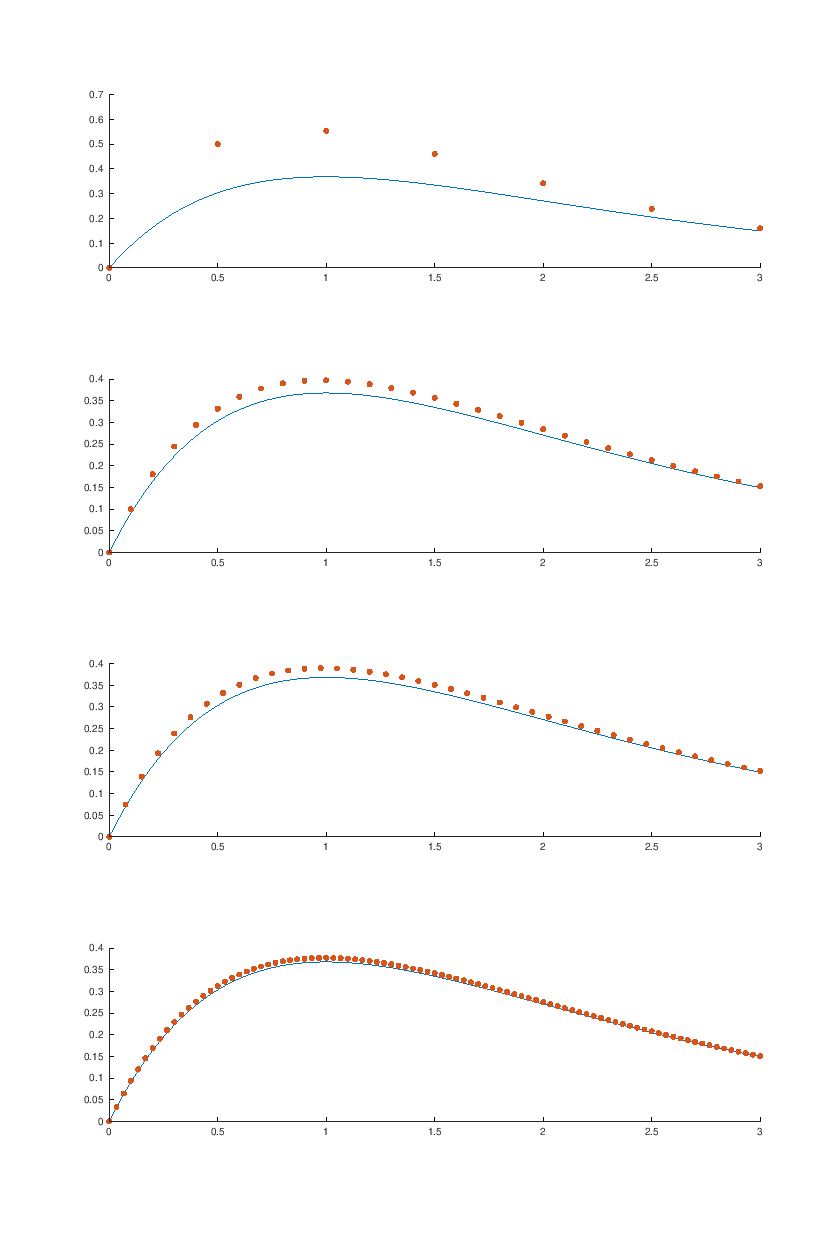

In [4]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = taylor_1(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-1);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = taylor_1(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 0.11);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.075; N = 40;
res = taylor_1(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 0.105);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1 / 3; N = 90;
res = taylor_1(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 0.07);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 2

Implementati funcția ```taylor_2(df, dfdt, dfdx, t0, x0, h, N)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$), ce reprezintă derivata lui $x(t)$, un handle la o funcție $dfdt$ (derivata parțială față de $t$ a lui $df$), un handle la o funcție $dfdx$ (derivata parțială față de $x$ a lui $df$), un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, și numărul total de pași, $N$, și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

In [5]:
function [values] = taylor_2(df, dfdt, dfdx, t0, x0, h, N)
    % YOUR CODE HERE
    values = zeros(1, N + 1);
    
    for i = 2 : N + 1
        values(1) = x0;
        tk = t0 + h * (i - 2);
        xk = values(i - 1);
        values(i) = xk + h * df(tk, xk) + 0.5 * h ^ 2 * (dfdt(tk) + dfdx(xk) * df(tk, xk));
    endfor
    
endfunction 

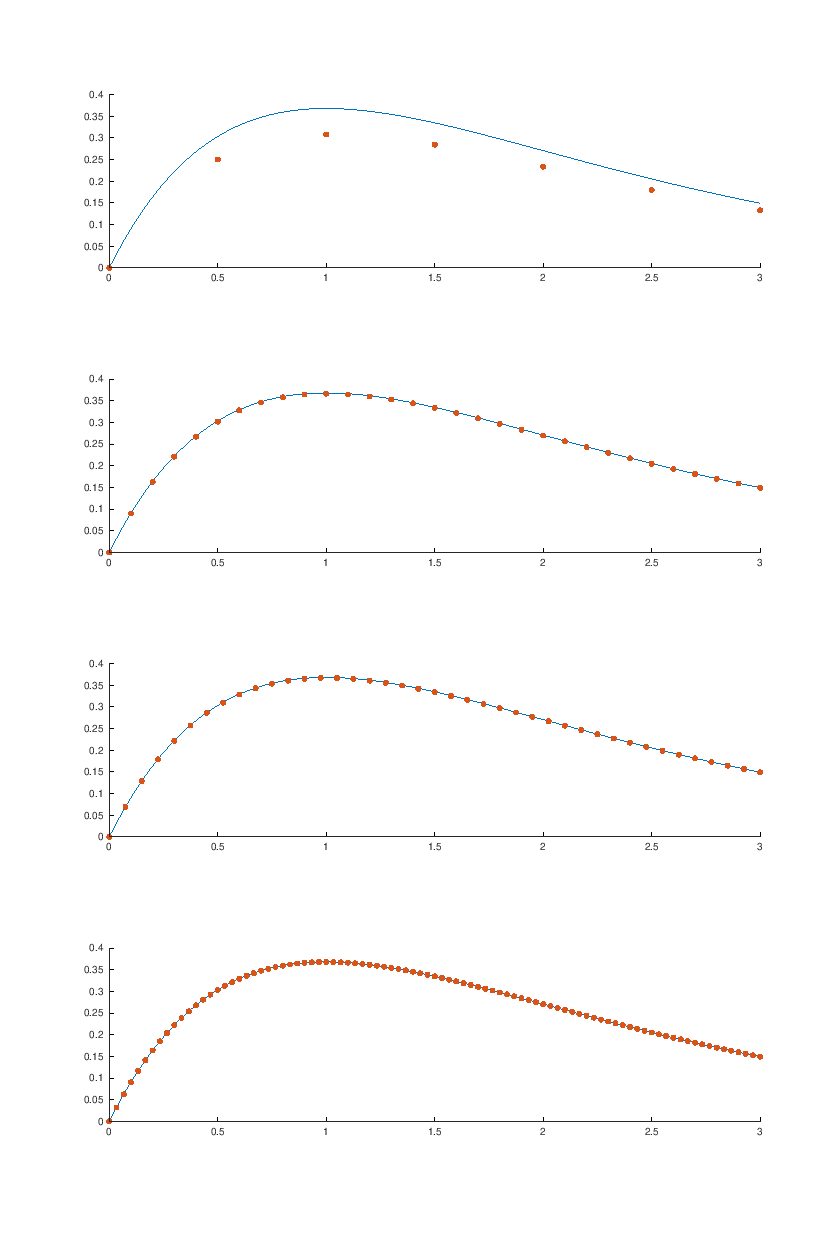

In [6]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

function[y] = dfdt(t)
    y = -exp(-t);
endfunction

function[y] = dfdx(x)
    y = -1;
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = taylor_2(@df, @dfdt, @dfdx, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = taylor_2(@df, @dfdt, @dfdx, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-3);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.075; N = 40;
res = taylor_2(@df, @dfdt, @dfdx, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1 / 3; N = 90;
res = taylor_2(@df, @dfdt, @dfdx, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-5);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 3

Implementati funcția ```rk2_heun(df, t0, x0, h, N)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$), ce reprezintă derivata lui $x(t)$, un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, și numărul total de pași, $N$, și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

In [7]:
function [values] = rk2_heun(df, t0, x0, h, N)
    % YOUR CODE HERE
    values = zeros(1, N + 1);
    
    for i = 2 : N + 1
        values(1) = x0;
        tk = t0 + h * (i - 2);
        xk = values(i - 1);
        K1 = h * df(tk, xk);
        K2 = h * df(tk + h, xk + K1);
        values(i) = xk + 0.5 * (K1 + K2);
    endfor
    
endfunction

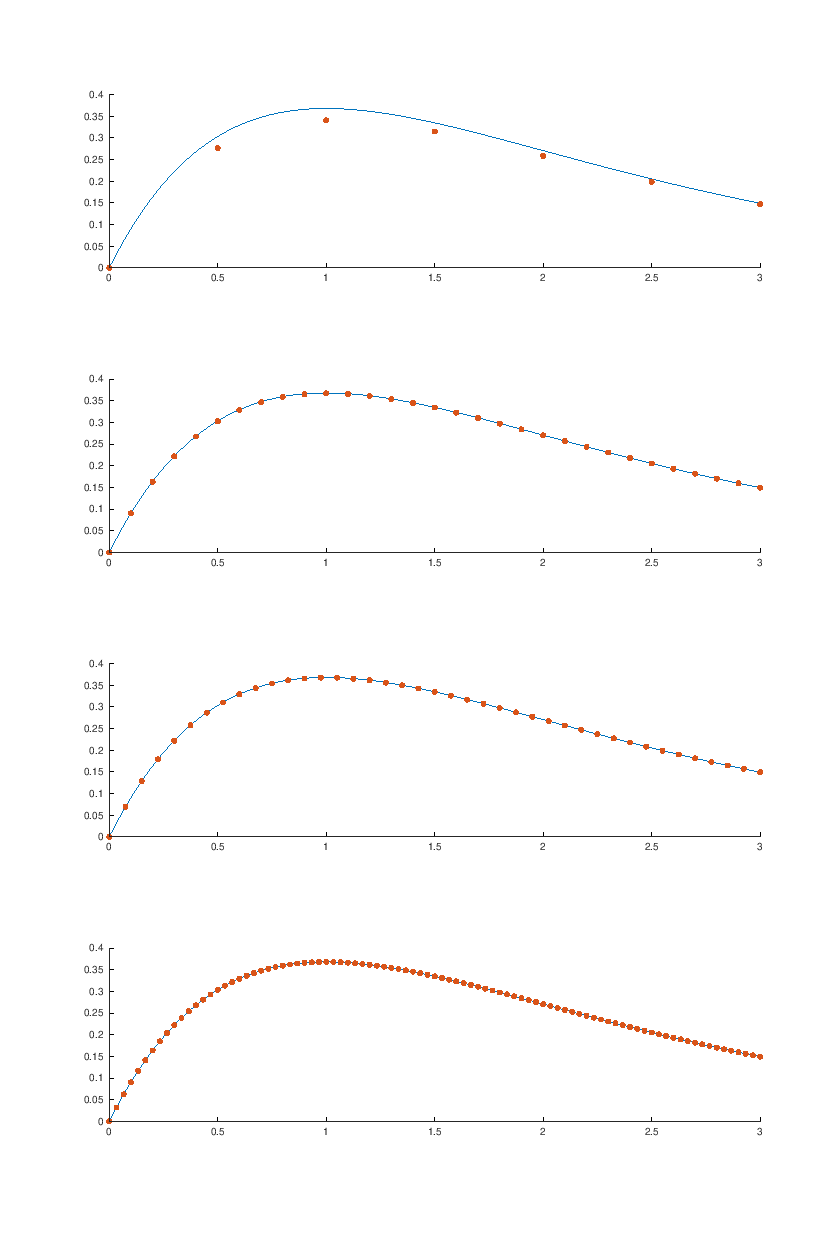

In [8]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = rk2_heun(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-2);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = rk2_heun(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-4);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.075; N = 40;
res = rk2_heun(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1 / 3; N = 90;
res = rk2_heun(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-5);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 4

Implementati funcția ```rk4_classic(df, t0, x0, h, N)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$), ce reprezintă derivata lui $x(t)$, un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, și numărul total de pași, $N$, și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

In [9]:
function [values] = rk4_classic(df, t0, x0, h, N)
    % YOUR CODE HERE
    values = zeros(1, N + 1);
    
    for i = 2 : N + 1
        values(1) = x0;
        tk = t0 + h * (i - 2);
        xk = values(i - 1);
        
        K1 = h * df(tk, xk);
        K2 = h * df(tk + 0.5 * h, xk + 0.5 * K1);
        K3 = h * df(tk + 0.5 *h, xk + 0.5 * K2);
        K4 = h * df(tk + h, xk + K3);
        
        values(i) = xk + (1/6) * (K1 + 2 * K2 + 2 * K3 + K4);
    endfor 
    
endfunction

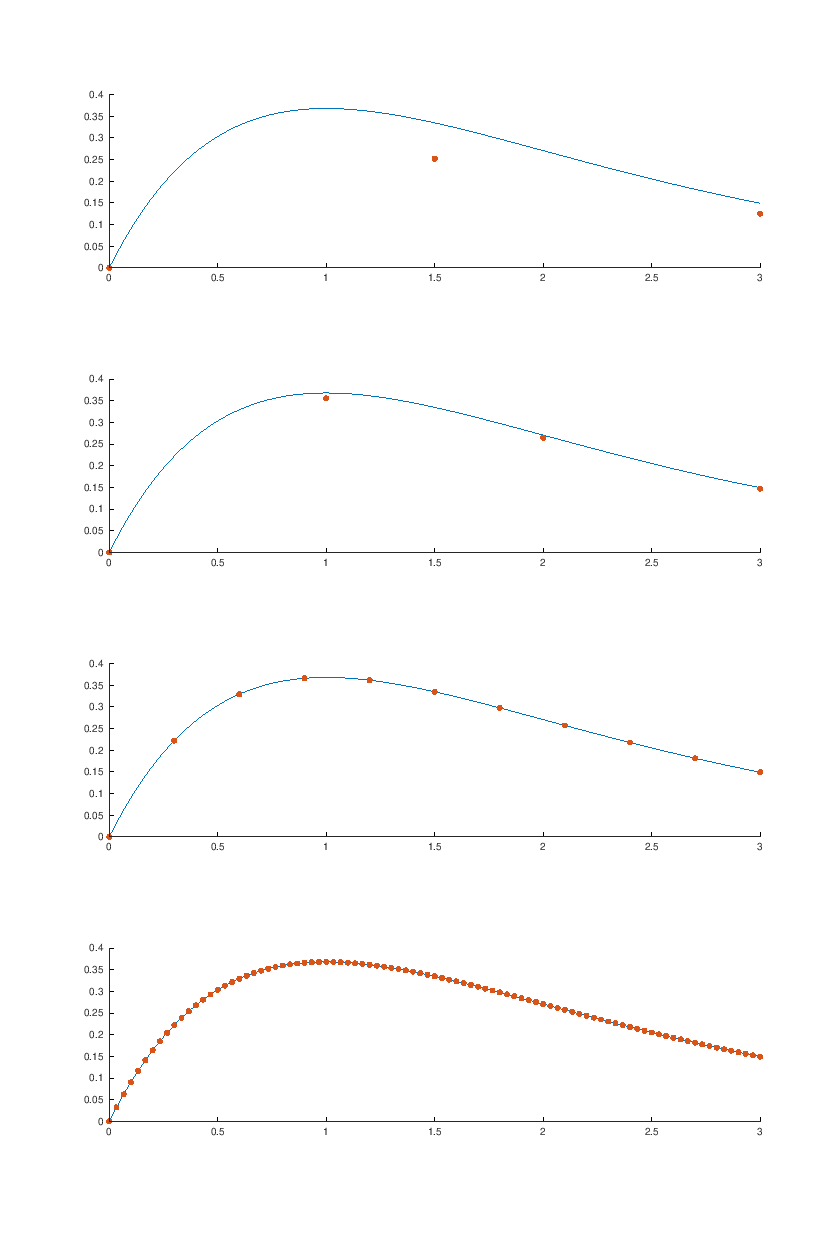

In [10]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 1.5; N = 2;
res = rk4_classic(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 1; N = 3;
res = rk4_classic(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-3);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.3; N = 10;
res = rk4_classic(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-5);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1 / 3; N = 90;
res = rk4_classic(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-10);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 5

Implementati funcția ```ab2_explicit(df, t0, x0, h, N, initial_approximator)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$), ce reprezintă derivata lui $x(t)$, un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, numărul total de pași, $N$, și un handle la o funcție ce va fi folosită pentru aproximarea inițială a lui $x_1$ și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

In [11]:
function [values] = ab2_explicit(df, t0, x0, h, N, initial_approximator)
    % YOUR CODE HERE
    values = zeros(1, N + 1);
    res = initial_approximator(df, t0, x0, h, 1);
    
    
    for i = 3 : N + 1
        values(1:2) = res;
        tk_1 = t0 + h * (i - 3);
        tk = t0 + h * (i -2);
        
        xk_1 = values(i - 2);
        xk = values(i - 1);
        
        values(i) = xk + (h / 2) * (3 * df(tk, xk) - df(tk_1, xk_1));
    endfor
    
endfunction

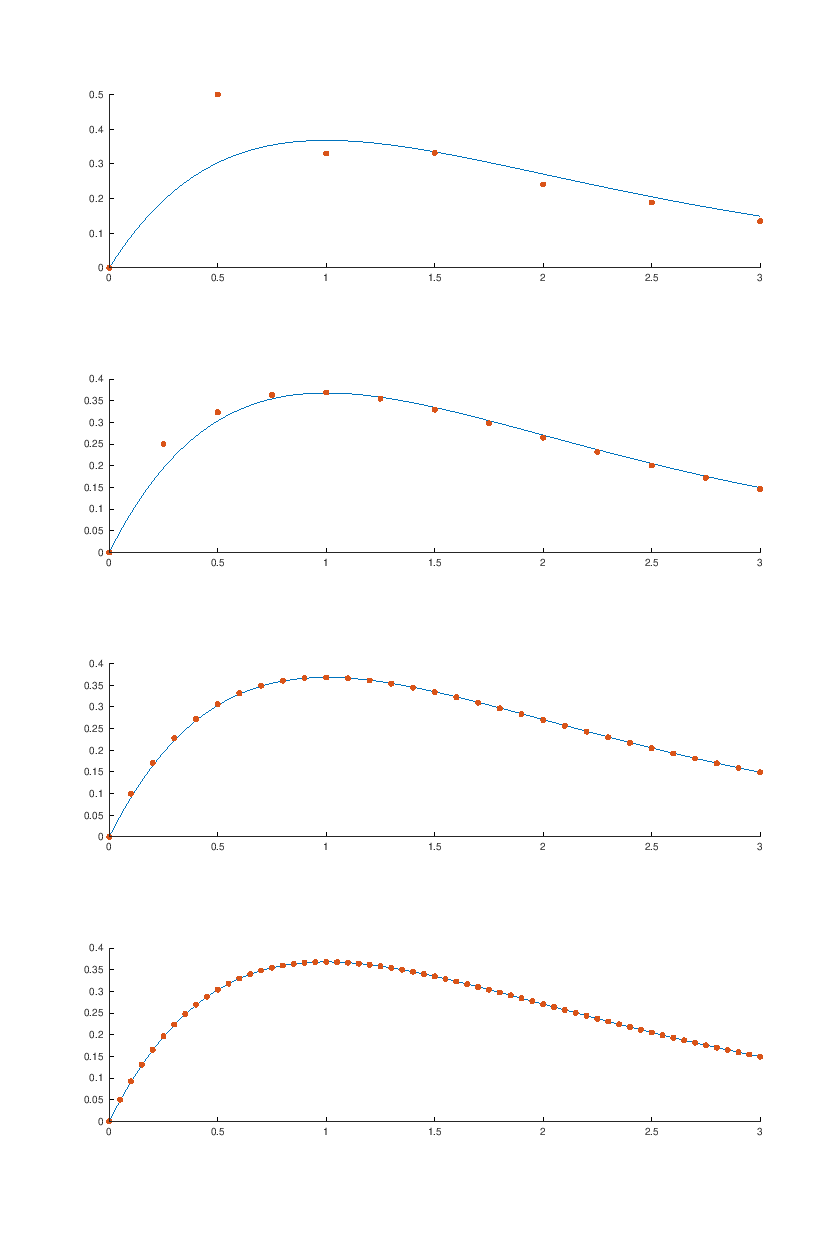

In [12]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = ab2_explicit(@df, t0, x0, h, N, @taylor_1);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-1);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.25; N = 12;
res = ab2_explicit(@df, t0, x0, h, N, @taylor_1);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-2);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = ab2_explicit(@df, t0, x0, h, N, @taylor_1);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.05; N = 60;
res = ab2_explicit(@df, t0, x0, h, N, @taylor_1);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-4);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

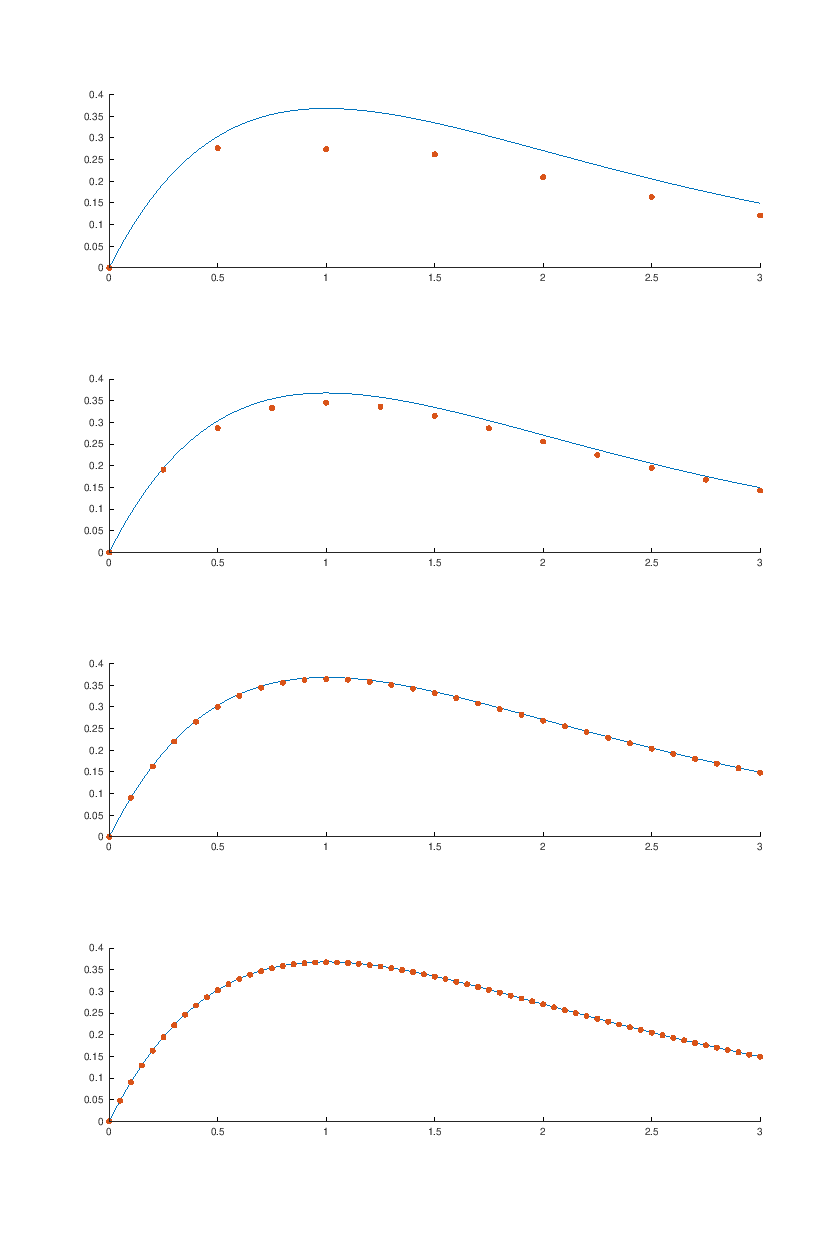

In [13]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = ab2_explicit(@df, t0, x0, h, N, @rk2_heun);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-1);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.25; N = 12;
res = ab2_explicit(@df, t0, x0, h, N, @rk2_heun);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = ab2_explicit(@df, t0, x0, h, N, @rk2_heun);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.05; N = 60;
res = ab2_explicit(@df, t0, x0, h, N, @rk2_heun);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-4);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

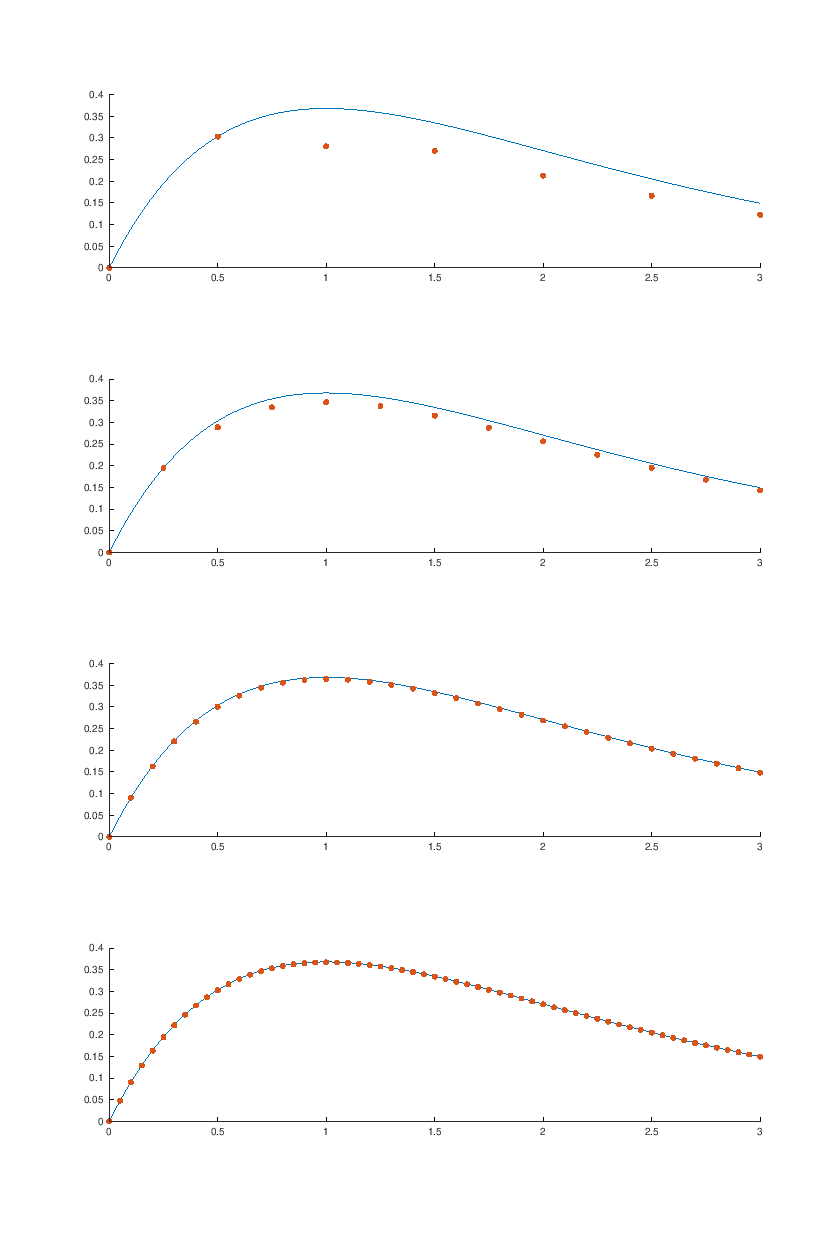

In [14]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = ab2_explicit(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.25; N = 12;
res = ab2_explicit(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = ab2_explicit(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.05; N = 60;
res = ab2_explicit(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-4);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 6

Implementati funcția ```abm_multistep(df, t0, x0, h, N, initial_approximator)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$), ce reprezintă derivata lui $x(t)$, un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, numărul total de pași, $N$, și un handle la o funcție ce va fi folosită pentru aproximarea inițială a lui $x_1$ și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

In [15]:
function [values] = abm_multistep(df, t0, x0, h, N, initial_approximator)
    % YOUR CODE HERE
    values = zeros(1, N + 1);
    res = initial_approximator(df, t0, x0, h, 1);
    
    for i = 3 : N + 1
        values(1:2) = res;
        tk_0 = t0 + h * (i - 3);
        tk_1 = t0 + h * (i - 2);
        tk = t0 + h * (i - 1);
        
        xk_1 = values(i - 2);
        xk = values(i - 1);
        x_predictor = xk + h / 2 * (3 * df(tk_1, xk) - df(tk_0, xk_1));
        
        
        values(i) = xk + h / 2 * (df(tk, x_predictor) + df(tk_1, xk));
    endfor
    
endfunction

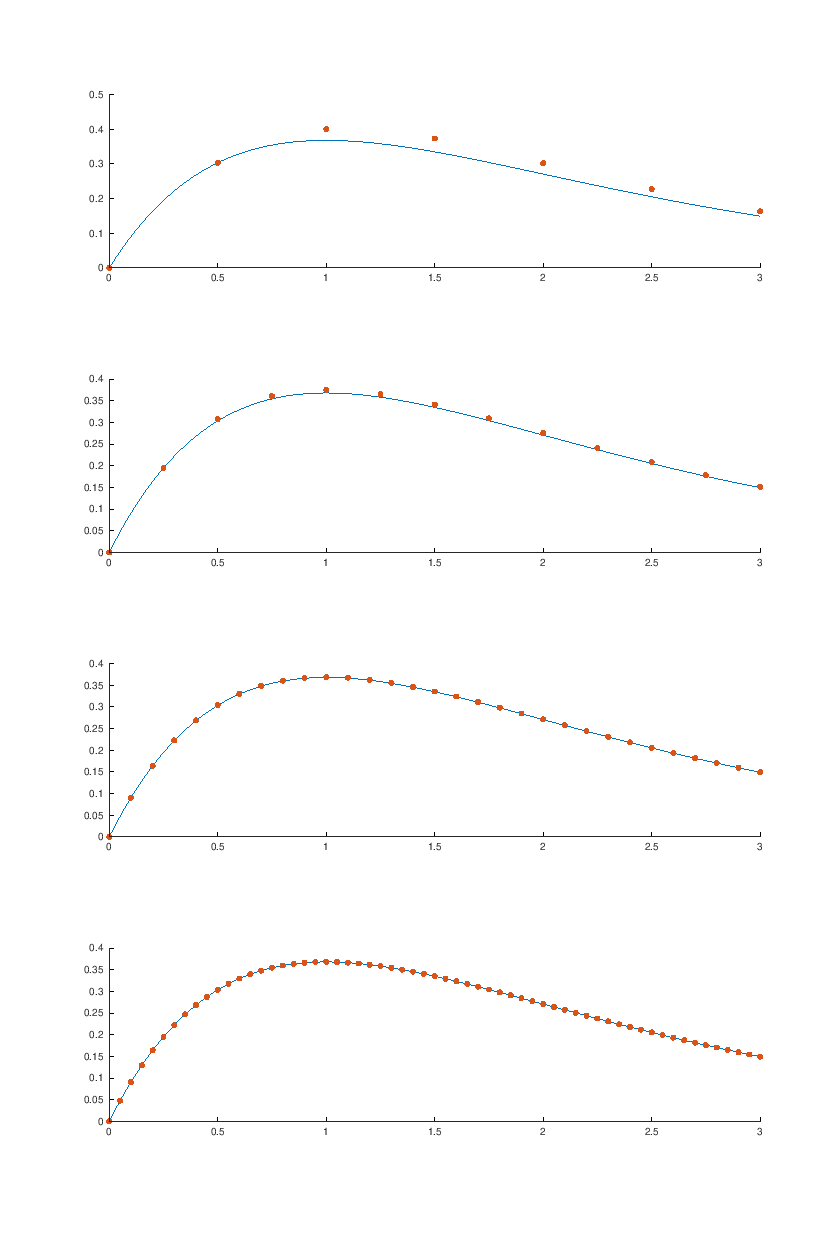

In [16]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = abm_multistep(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.25; N = 12;
res = abm_multistep(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = abm_multistep(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.05; N = 60;
res = abm_multistep(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-5);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);